In [2]:
from app.allocation import *
import matplotlib.pyplot as plt
from app.alloc_metric import *
from pprint import pprint
from collections import defaultdict 
import time
import json
import math

In [3]:
def showPopularity(pref):
    projectStudentMap = defaultdict(int)
    for _, l in pref.items():
        for p,_ in l:
            projectStudentMap[p] += 1
    return projectStudentMap

def staffPopularity(pref, projStaff):
    projectMap = showPopularity(studentPreferences)
    out = defaultdict(int)
    for k, v in projectMap.items():
        out[projStaff[k]] += v
    return out

def showLoad(alloc, StaffProjMap, ax=None, name=None, title='Loading For Each Supervisor'):
    ax = ax or plt.gca()
    loadMap = getLoadMap(StaffProjMap, alloc)
    ax.bar([str(a) for a in loadMap.keys()], loadMap.values())
    ax.set_title(title)
    return ax

def showRank(alloc, studentPreferences, ax=None, name=None, title='Number of Students For Each Rank'):
    ax = ax or plt.gca()
    rankMap = getStudentRankMap(alloc, studentPreferences)
    ax.hist(rankMap.values())
    ax.set_title(title)
    return ax

def getMetricList(stats_maxRank):
    new_stats = defaultdict(dict)
    for load, stat in stats_maxRank.items():
        for metric, val in stat.items():
            new_stats[metric][load] = val

    for metric, val in new_stats.items():
        sort_dict= dict(sorted(val.items(), key=lambda item: int(item[0])))
        new_stats[metric] = {int(a):float(b) for a,b in sort_dict.items()}
    return new_stats

def plotAllMetric(new_stats):
    fig, axes = plt.subplots(len(new_stats), 1, figsize=(10, 20), sharey='row')
    for i, ((metric, l)) in enumerate(new_stats.items()):
        axes[i].plot(list(l.keys()), list(l.values()), label='Depth')
        axes[i].set_ylabel(metric)
    axes[0].set_title('Metrics Against Number of Run with Depth = 5 and Loading Constraint = 4')
    fig.tight_layout()


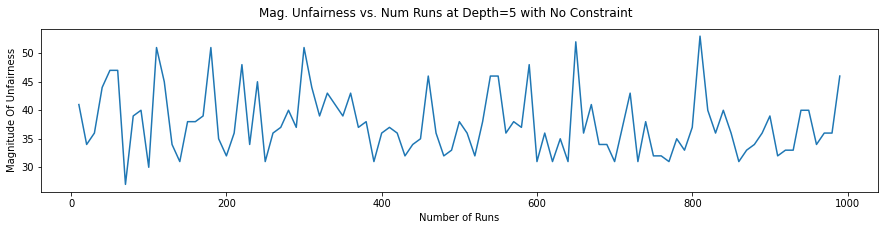

In [19]:
# a_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stats_depth5_rank5", "r")
# stat_rank = json.load(a_file)
# cleanStatRank = getMetricList(stat_rank)
b_file = open("/mnt/c/Users/Ramon/Documents/Codes/FYP/App/allocation/evaluations/results/stat_depth5_load20", "r")
stat = json.load(b_file)
cleanStat = getMetricList(stat)
fig,axes = plt.subplots(1, figsize=(15,3))
plt.suptitle('Mag. Unfairness vs. Num Runs at Depth=5 with No Constraint')
axes.plot(cleanStat['AvgRank'].keys(), cleanStat['MagUnfair'].values())
# axes.title.set_text('Max Load = 4')
# axes[1].plot(cleanStatRank['AvgRank'].keys(), cleanStatRank['MagUnfair'].values())
# axes[1].title.set_text('Max Rank = 5')
plt.xlabel('Number of Runs')
axes.set_ylabel('Magnitude Of Unfairness')
plt.savefig('unfairness_noconst.pdf')

In [5]:
fig,axes = plt.subplots(4, figsize=(10,6))
axes[0].plot(new_stats['AvgRank'].keys(), new_stats['AvgRank'].values())
axes[1].plot(new_stats['AveUnfair'].keys(), new_stats['AveUnfair'].values())
axes[2].plot(new_stats['VarLoad'].keys(), new_stats['VarLoad'].values())
axes[3].plot(new_stats['objective'].keys(), new_stats['objective'].values())
plt.suptitle('Metrics vs. Num Runs at Depth = 4 with Weight Unfair = 0.1 and Weight Variance=1')
plt.xlabel('Number of Runs')
axes[0].set_ylabel('Average Rank')
axes[1].set_ylabel('Magnitude Unfairness')
axes[2].set_ylabel('Variance Loading')
axes[3].set_ylabel('Objective Function')
fig.tight_layout()
# print(new_stats['AvgRank'])
plt.savefig('./evaluations/figures/depth4-NoCon-minunfairandvariance.svg')

NameError: name 'new_stats' is not defined

NameError: name 'getMetricList' is not defined